In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import iplot,init_notebook_mode
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from numpy.random import normal,seed
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA,ARIMA

import math
from sklearn.metrics import mean_squared_error

In [2]:
google = pd.read_csv('D:/Subhradeep/Study_Data_Scientist/Projects/kaggle/TimeSeries/stock-time-series-20050101-to-20171231/GOOGL_2006-01-01_to_2018-01-01.csv',index_col='Date',parse_dates=['Date'])
humidity = pd.read_csv('D:/Subhradeep/Study_Data_Scientist/Projects/kaggle/TimeSeries/historical-hourly-weather-data\humidity.csv',index_col='datetime',parse_dates=['datetime'])

In [3]:
google.head()

Open    High     Low   Close    Volume   Name
Date                                                       
2006-01-03  211.47  218.05  209.32  217.83  13137450  GOOGL
2006-01-04  222.17  224.70  220.09  222.84  15292353  GOOGL
2006-01-05  223.22  226.00  220.97  225.85  10815661  GOOGL
2006-01-06  228.66  235.49  226.85  233.06  17759521  GOOGL
2006-01-09  233.44  236.94  230.70  233.68  12795837  GOOGL

In [4]:
humidity.head(2)

Vancouver  Portland  San Francisco  Seattle  Los Angeles  \
datetime                                                                        
2012-10-01 12:00:00        NaN       NaN            NaN      NaN          NaN   
2012-10-01 13:00:00       76.0      81.0           88.0     81.0         88.0   

                     San Diego  Las Vegas  Phoenix  Albuquerque  Denver  ...  \
datetime                                                                 ...   
2012-10-01 12:00:00        NaN        NaN      NaN          NaN     NaN  ...   
2012-10-01 13:00:00       82.0       22.0     23.0         50.0    62.0  ...   

                     Philadelphia  New York  Montreal  Boston  Beersheba  \
datetime                                                                   
2012-10-01 12:00:00           NaN       NaN       NaN     NaN        NaN   
2012-10-01 13:00:00          71.0      58.0      93.0    68.0       50.0   

                     Tel Aviv District  Eilat  Haifa  Nahariyya  Jerusalem  
datetime                                                                    
2012-10-01 12:00:00                NaN   25.0    NaN        NaN        NaN  
2012-10-01 13:00:00               63.0   22.0   51.0       51.0       50.0  

[2 rows x 36 columns]

In [5]:
google.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

In [6]:
humidity.isna().sum()

Vancouver            1826
Portland              449
San Francisco         942
Seattle               289
Los Angeles           152
San Diego             344
Las Vegas             842
Phoenix              1308
Albuquerque           710
Denver               1808
San Antonio           564
Dallas                319
Houston               121
Kansas City           512
Minneapolis           510
Saint Louis          1289
Chicago              1109
Nashville             567
Indianapolis          695
Atlanta               422
Detroit               862
Jacksonville          209
Charlotte             589
Miami                1087
Pittsburgh            522
Toronto               728
Philadelphia          624
New York             1624
Montreal             1696
Boston                449
Beersheba             859
Tel Aviv District    1113
Eilat                 970
Haifa                 818
Nahariyya             817
Jerusalem             906
dtype: int64

In [7]:
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method='ffill')
humidity.head()



Vancouver  Portland  San Francisco  Seattle  Los Angeles  \
datetime                                                                        
2012-10-01 13:00:00       76.0      81.0           88.0     81.0         88.0   
2012-10-01 14:00:00       76.0      80.0           87.0     80.0         88.0   
2012-10-01 15:00:00       76.0      80.0           86.0     80.0         88.0   
2012-10-01 16:00:00       77.0      80.0           85.0     79.0         88.0   
2012-10-01 17:00:00       78.0      79.0           84.0     79.0         88.0   

                     San Diego  Las Vegas  Phoenix  Albuquerque  Denver  ...  \
datetime                                                                 ...   
2012-10-01 13:00:00       82.0       22.0     23.0         50.0    62.0  ...   
2012-10-01 14:00:00       81.0       21.0     23.0         49.0    62.0  ...   
2012-10-01 15:00:00       81.0       21.0     23.0         49.0    62.0  ...   
2012-10-01 16:00:00       81.0       21.0     23.0         49.0    62.0  ...   
2012-10-01 17:00:00       80.0       21.0     24.0         49.0    63.0  ...   

                     Philadelphia  New York  Montreal  Boston  Beersheba  \
datetime                                                                   
2012-10-01 13:00:00          71.0      58.0      93.0    68.0       50.0   
2012-10-01 14:00:00          70.0      57.0      91.0    68.0       51.0   
2012-10-01 15:00:00          70.0      57.0      87.0    68.0       51.0   
2012-10-01 16:00:00          69.0      57.0      84.0    68.0       52.0   
2012-10-01 17:00:00          69.0      57.0      80.0    68.0       54.0   

                     Tel Aviv District  Eilat  Haifa  Nahariyya  Jerusalem  
datetime                                                                    
2012-10-01 13:00:00               63.0   22.0   51.0       51.0       50.0  
2012-10-01 14:00:00               62.0   22.0   51.0       51.0       50.0  
2012-10-01 15:00:00               62.0   22.0   51.0       51.0       50.0  
2012-10-01 16:00:00               62.0   22.0   51.0       51.0       50.0  
2012-10-01 17:00:00               62.0   23.0   51.0       51.0       50.0  

[5 rows x 36 columns]

**Visualizing the dataset of Humidity**


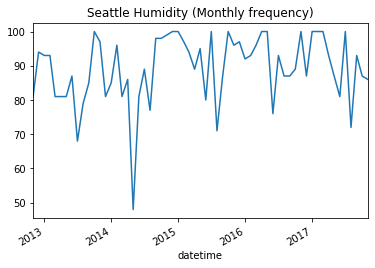

In [8]:
humidity['Seattle'].asfreq('M').plot()
plt.title('Seattle Humidity (Monthly frequency)')
plt.show()

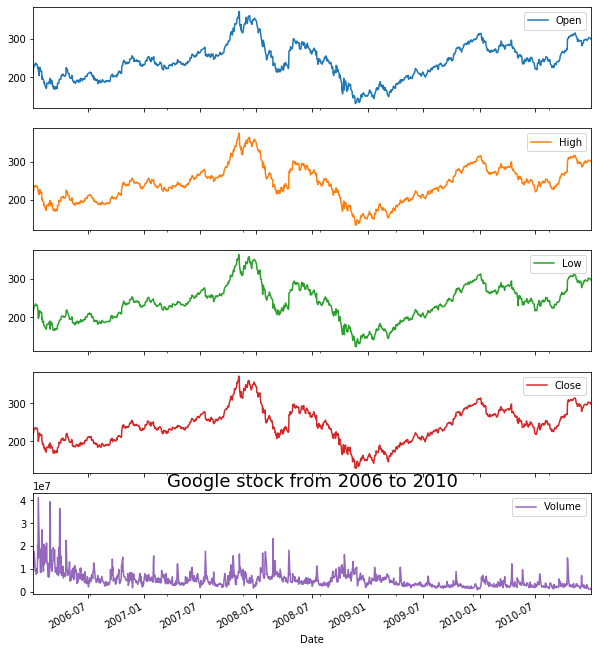

In [9]:
google['2006':'2010'].plot(subplots=True,figsize=(10,12),legend=True)
plt.title('Google stock from 2006 to 2010',size=18)
plt.savefig('stocks.png')
plt.show()


**Timestamp and Periods**

In [10]:
# Creating a timestamp
timestamp = pd.Timestamp(2020,1,1,12)
timestamp

Timestamp('2020-01-01 12:00:00')

In [11]:
#Creating a period
period = pd.Period('2020-01-01')
period


Period('2020-01-01', 'D')

In [12]:
#Checking if a timestamp exists between that period of not
period.start_time<timestamp<period.end_time

True

In [13]:
#Converting timestamp to period

new_period = timestamp.to_period(freq='H')
new_period

Period('2020-01-01 12:00', 'H')

In [14]:
#Converting period to timestamp
new_timestamp = period.to_timestamp(freq='H',how='start')
new_timestamp

Timestamp('2020-01-01 00:00:00')

In [15]:
#Creating a daterange with frequencies

dr_1 = pd.date_range(start='1/1/2020',end='1/12/2020')
dr_1

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12'],
              dtype='datetime64[ns]', freq='D')

In [16]:
#creating a daterange with monthly

dr_2 = pd.date_range(start='1/1/2020',end='1/1/2021',freq = 'M')
dr_2

DatetimeIndex(['2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31'],
              dtype='datetime64[ns]', freq='M')

In [17]:
#creating a daterange without using start and end dates and periods

dr_3 = pd.date_range('1/1/2020',periods=8)
dr_3

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08'],
              dtype='datetime64[ns]', freq='D')

**to_datetime** functionality

In [18]:
dt_1 = pd.DataFrame({'year':[2020],'month':4,'day':3})
dt_1

year  month  day
0  2020      4    3

In [19]:
dt_1 = pd.to_datetime(dt_1)
dt_1

0   2020-04-03
dtype: datetime64[ns]

In [20]:
dt_2 = pd.to_datetime('2020-01-01')
dt_2

Timestamp('2020-01-01 00:00:00')

**Shifting and Lags**

We can shift index by desired number of periods with an optional time frequency. This is useful when comparing the time series with a past of itself

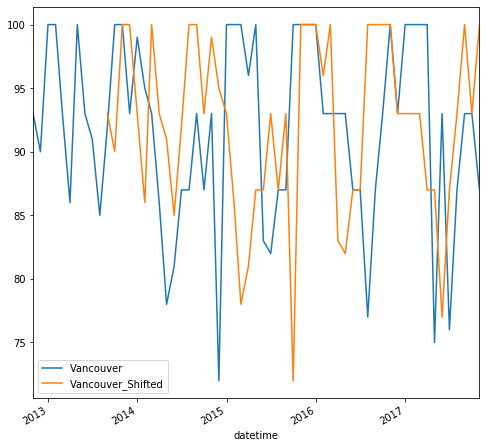

In [21]:
plt.figure(figsize=(8,8))
humidity['Vancouver'].asfreq('M').plot(legend=True)
shifted = humidity['Vancouver'].asfreq('M').shift(10).plot(legend=True)
shifted.legend(['Vancouver','Vancouver_Shifted'])
plt.show()

**Resampling**

**Upsampling** :  Time series is resampled from low frequency to high frequency(Monthly to daily frequency). It involves filling or interpolating missing data

**Downsampling** : Time series is resampled from high frequency to low frequency(Weekly to monthly frequency). It involves aggregation of existing data.

In [22]:
pressure = pd.read_csv('D:/Subhradeep/Study_Data_Scientist/Projects/kaggle/TimeSeries/historical-hourly-weather-data/pressure.csv',
                       index_col='datetime',parse_dates=['datetime'])

In [23]:
pressure.isna().sum()

Vancouver            4234
Portland                4
San Francisco         815
Seattle                13
Los Angeles           252
San Diego             175
Las Vegas              88
Phoenix               594
Albuquerque           456
Denver                543
San Antonio            17
Dallas                 60
Houston                 9
Kansas City           121
Minneapolis            17
Saint Louis            68
Chicago               725
Nashville             147
Indianapolis          289
Atlanta                49
Detroit                 5
Jacksonville           15
Charlotte               3
Miami                 794
Pittsburgh             46
Toronto               175
Philadelphia            4
New York             1041
Montreal              994
Boston                  7
Beersheba             806
Tel Aviv District     930
Eilat                 792
Haifa                 798
Nahariyya             795
Jerusalem             799
dtype: int64

In [24]:
pressure = pressure.iloc[1:]
pressure = pressure.fillna(method='ffill')
pressure = pressure.fillna(method='bfill')

In [25]:
pressure.isna().sum()

Vancouver            0
Portland             0
San Francisco        0
Seattle              0
Los Angeles          0
San Diego            0
Las Vegas            0
Phoenix              0
Albuquerque          0
Denver               0
San Antonio          0
Dallas               0
Houston              0
Kansas City          0
Minneapolis          0
Saint Louis          0
Chicago              0
Nashville            0
Indianapolis         0
Atlanta              0
Detroit              0
Jacksonville         0
Charlotte            0
Miami                0
Pittsburgh           0
Toronto              0
Philadelphia         0
New York             0
Montreal             0
Boston               0
Beersheba            0
Tel Aviv District    0
Eilat                0
Haifa                0
Nahariyya            0
Jerusalem            0
dtype: int64

In [26]:
pressure.shape

(45252, 36)

In [27]:
pressure.head()

Vancouver  Portland  San Francisco  Seattle  Los Angeles  \
datetime                                                                        
2012-10-01 13:00:00      807.0    1024.0         1009.0   1027.0       1013.0   
2012-10-01 14:00:00      807.0    1024.0         1009.0   1027.0       1013.0   
2012-10-01 15:00:00      807.0    1024.0         1009.0   1028.0       1013.0   
2012-10-01 16:00:00      807.0    1024.0         1009.0   1028.0       1013.0   
2012-10-01 17:00:00      807.0    1024.0         1009.0   1029.0       1013.0   

                     San Diego  Las Vegas  Phoenix  Albuquerque  Denver  ...  \
datetime                                                                 ...   
2012-10-01 13:00:00     1013.0     1018.0   1013.0       1024.0  1028.0  ...   
2012-10-01 14:00:00     1013.0     1018.0   1013.0       1024.0  1028.0  ...   
2012-10-01 15:00:00     1013.0     1018.0   1013.0       1024.0  1028.0  ...   
2012-10-01 16:00:00     1013.0     1018.0   1013.0       1024.0  1028.0  ...   
2012-10-01 17:00:00     1013.0     1018.0   1013.0       1024.0  1028.0  ...   

                     Philadelphia  New York  Montreal  Boston  Beersheba  \
datetime                                                                   
2012-10-01 13:00:00        1014.0    1012.0    1001.0  1014.0      984.0   
2012-10-01 14:00:00        1014.0    1012.0     986.0  1014.0      984.0   
2012-10-01 15:00:00        1014.0    1012.0     945.0  1014.0      984.0   
2012-10-01 16:00:00        1014.0    1012.0     904.0  1014.0      984.0   
2012-10-01 17:00:00        1014.0    1012.0     863.0  1014.0      984.0   

                     Tel Aviv District   Eilat   Haifa  Nahariyya  Jerusalem  
datetime                                                                      
2012-10-01 13:00:00             1012.0  1010.0  1013.0     1013.0      990.0  
2012-10-01 14:00:00             1012.0  1010.0  1013.0     1013.0      990.0  
2012-10-01 15:00:00             1012.0  1010.0  1013.0     1013.0      990.0  
2012-10-01 16:00:00             1012.0  1010.0  1013.0     1013.0      990.0  
2012-10-01 17:00:00             1012.0  1010.0  1013.0     1013.0      990.0  

[5 rows x 36 columns]

In [28]:
# We downsample from hourly to 3 day frequency using aggregate mean

pressure = pressure.resample('3D').mean()
pressure.head()

Vancouver     Portland  San Francisco      Seattle  Los Angeles  \
datetime                                                                        
2012-10-01   931.627119  1022.644068    1010.881356  1031.271186  1011.627119   
2012-10-04  1019.083333  1023.041667    1014.694444  1028.305556  1015.555556   
2012-10-07  1013.930556  1017.444444    1016.597222  1018.736111  1013.416667   
2012-10-10  1015.000000  1015.430556    1014.833333  1018.416667  1010.694444   
2012-10-13  1008.152778  1018.111111    1021.069444  1015.930556  1017.277778   

              San Diego    Las Vegas      Phoenix  Albuquerque       Denver  \
datetime                                                                      
2012-10-01  1011.966102  1016.322034  1012.084746  1022.542373  1024.118644   
2012-10-04  1016.277778  1013.194444  1014.097222  1019.972222  1020.666667   
2012-10-07  1014.222222  1012.888889  1011.861111  1005.833333  1020.458333   
2012-10-10  1014.013889  1000.166667  1005.611111   986.000000   984.486111   
2012-10-13  1018.375000  1015.666667  1015.500000  1013.625000  1010.444444   

            ...  Philadelphia     New York     Montreal       Boston  \
datetime    ...                                                        
2012-10-01  ...   1014.152542  1013.423729   937.627119  1013.677966   
2012-10-04  ...   1018.097222  1017.680556  1017.180556  1019.805556   
2012-10-07  ...   1017.958333  1016.750000  1014.152778  1016.305556   
2012-10-10  ...   1018.694444  1017.916667  1016.166667  1017.319444   
2012-10-13  ...   1025.055556  1024.388889  1020.805556  1023.736111   

             Beersheba  Tel Aviv District        Eilat        Haifa  \
datetime                                                              
2012-10-01  985.050847        1012.949153  1011.796610  1013.000000   
2012-10-04  984.930556        1013.083333  1012.611111  1013.000000   
2012-10-07  982.972222        1013.027778  1007.555556  1013.000000   
2012-10-10  979.763889        1006.527778   998.763889  1012.333333   
2012-10-13  984.527778        1013.027778  1007.194444  1013.000000   

              Nahariyya   Jerusalem  
datetime                             
2012-10-01  1013.000000  990.525424  
2012-10-04  1013.000000  990.083333  
2012-10-07  1013.000000  989.833333  
2012-10-10  1012.333333  987.888889  
2012-10-13  1013.000000  990.430556  

[5 rows x 36 columns]

In [29]:
pressure.shape

(629, 36)

In [30]:
# Upsample from 3 day to daily frequency
pressure = pressure.resample('D').pad()
pressure.head()

Vancouver     Portland  San Francisco      Seattle  Los Angeles  \
datetime                                                                        
2012-10-01   931.627119  1022.644068    1010.881356  1031.271186  1011.627119   
2012-10-02   931.627119  1022.644068    1010.881356  1031.271186  1011.627119   
2012-10-03   931.627119  1022.644068    1010.881356  1031.271186  1011.627119   
2012-10-04  1019.083333  1023.041667    1014.694444  1028.305556  1015.555556   
2012-10-05  1019.083333  1023.041667    1014.694444  1028.305556  1015.555556   

              San Diego    Las Vegas      Phoenix  Albuquerque       Denver  \
datetime                                                                      
2012-10-01  1011.966102  1016.322034  1012.084746  1022.542373  1024.118644   
2012-10-02  1011.966102  1016.322034  1012.084746  1022.542373  1024.118644   
2012-10-03  1011.966102  1016.322034  1012.084746  1022.542373  1024.118644   
2012-10-04  1016.277778  1013.194444  1014.097222  1019.972222  1020.666667   
2012-10-05  1016.277778  1013.194444  1014.097222  1019.972222  1020.666667   

            ...  Philadelphia     New York     Montreal       Boston  \
datetime    ...                                                        
2012-10-01  ...   1014.152542  1013.423729   937.627119  1013.677966   
2012-10-02  ...   1014.152542  1013.423729   937.627119  1013.677966   
2012-10-03  ...   1014.152542  1013.423729   937.627119  1013.677966   
2012-10-04  ...   1018.097222  1017.680556  1017.180556  1019.805556   
2012-10-05  ...   1018.097222  1017.680556  1017.180556  1019.805556   

             Beersheba  Tel Aviv District        Eilat   Haifa  Nahariyya  \
datetime                                                                    
2012-10-01  985.050847        1012.949153  1011.796610  1013.0     1013.0   
2012-10-02  985.050847        1012.949153  1011.796610  1013.0     1013.0   
2012-10-03  985.050847        1012.949153  1011.796610  1013.0     1013.0   
2012-10-04  984.930556        1013.083333  1012.611111  1013.0     1013.0   
2012-10-05  984.930556        1013.083333  1012.611111  1013.0     1013.0   

             Jerusalem  
datetime                
2012-10-01  990.525424  
2012-10-02  990.525424  
2012-10-03  990.525424  
2012-10-04  990.083333  
2012-10-05  990.083333  

[5 rows x 36 columns]

In [31]:
#Shape after resampling
pressure.shape

(1885, 36)

**Percentage Change**


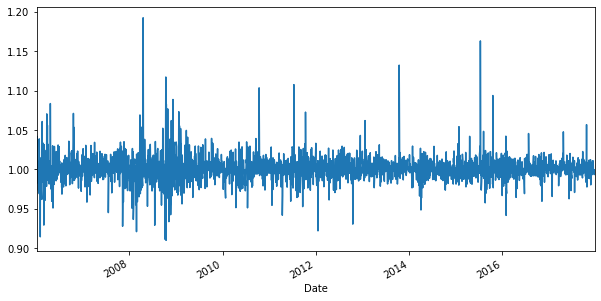

In [32]:


google['Change'] = google.High.div(google.High.shift())
google['Change'].plot(figsize=(10,5))
plt.show()

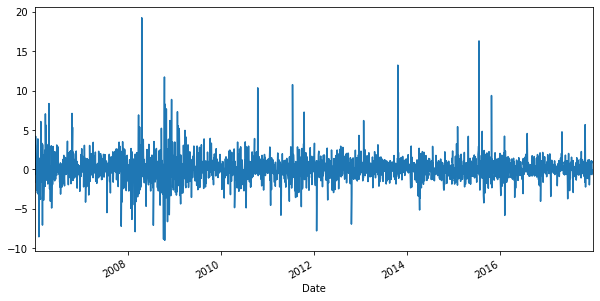

In [33]:

google['Returns'] = google.Change.sub(1).mul(100)
google['Returns'].plot(figsize=(10,5))
plt.show()

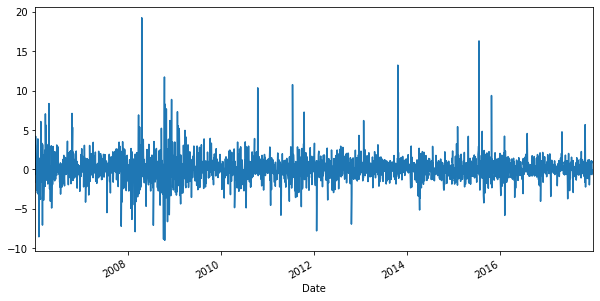

In [34]:
#Another way to calculate percentage change

google.High.pct_change().mul(100).plot(figsize=(10,5))
plt.show()

**Absolute Change in successive days**


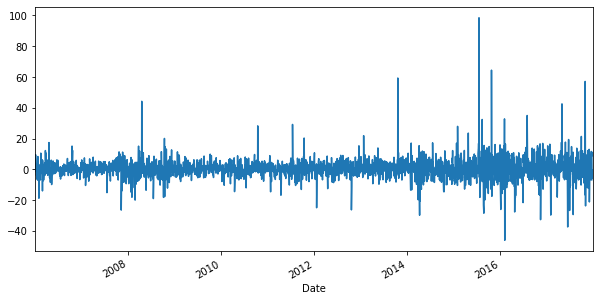

In [35]:
google.High.diff().plot(figsize=(10,5))

**Comparing two or more timeseries**

In [36]:
microsoft = pd.read_csv('D:/Subhradeep/Study_Data_Scientist/Projects/kaggle/TimeSeries/stock-time-series-20050101-to-20171231/MSFT_2006-01-01_to_2018-01-01.csv',
                       index_col='Date',parse_dates=['Date'])

In [37]:
microsoft.head()

Open   High    Low  Close     Volume  Name
Date                                                   
2006-01-03  26.25  27.00  26.10  26.84   79974418  MSFT
2006-01-04  26.77  27.08  26.77  26.97   57975661  MSFT
2006-01-05  26.96  27.13  26.91  26.99   48247610  MSFT
2006-01-06  26.89  27.00  26.49  26.91  100969092  MSFT
2006-01-09  26.93  27.07  26.76  26.86   55627836  MSFT

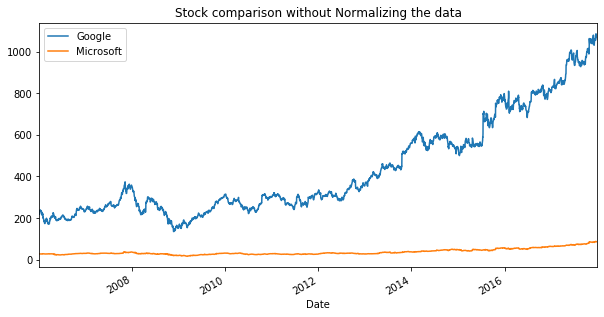

In [38]:
plt.figure(figsize=(10,5))
google.High.plot()
microsoft.High.plot()
plt.title('Stock comparison without Normalizing the data')
plt.legend(['Google','Microsoft'])
plt.show()

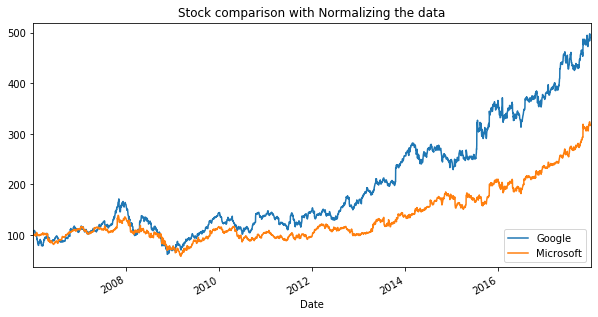

In [39]:
plt.figure(figsize=(10,5))
normalized_google = google.High.div(google.High.iloc[0]).mul(100)
normalized_microsoft = microsoft.High.div(microsoft.High.iloc[0]).mul(100)
normalized_google.plot()
normalized_microsoft.plot()
plt.title('Stock comparison with Normalizing the data')
plt.legend(['Google','Microsoft'],loc='lower right')
plt.show()



**Window Function**

Rolling - Same size and sliding

Expanding - The expanding() function is used to provide expanding transformations. Minimum number of observations in window required to have a value (otherwise result is NA). Set the labels at the center of the window. If the axis is a MultiIndex (hierarchical), group by a particular level or levels.

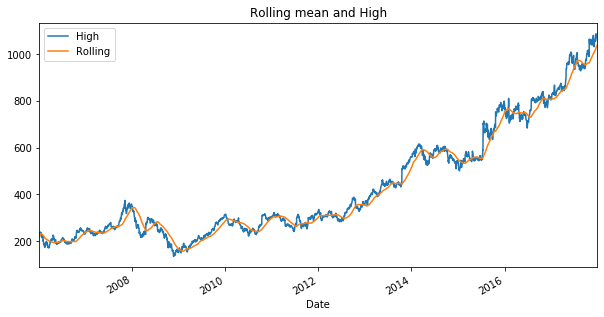

In [40]:
#Rolling window function
plt.figure(figsize=(10,5))
rolling_google = google.High.rolling('90D').mean()
google.High.plot()
rolling_google.plot()
plt.title('Rolling mean and High')
plt.legend(['High','Rolling'])
plt.show()

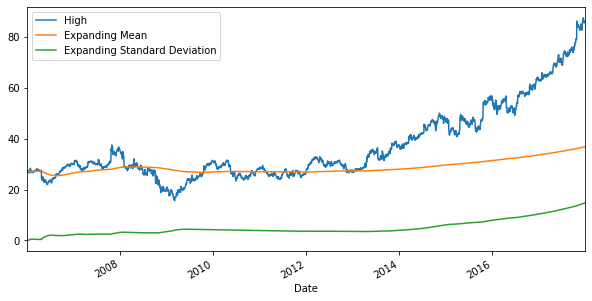

In [41]:
#Expanding Window function
plt.figure(figsize=(10,5))
microsoft_mean = microsoft.High.expanding().mean()
microsoft_std = microsoft.High.expanding().std()
microsoft.High.plot()
microsoft_mean.plot()
microsoft_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()


**OHLC Charts**


In [42]:
# OHLC Chart for google June 2008

trace = go.Ohlc(x=google['06-2008'].index,
                open=google['06-2008'].Open,
                high=google['06-2008'].High,
                low=google['06-2008'].Low,
                close=google['06-2008'].Close)
data=[trace]
iplot(data, filename ='google_simple_ohlc')

In [43]:
#OHLC Chart of Google- 2008
trace = go.Ohlc(x=google['2008'].index,
               open=google['2008'].Open,
               close=google['2008'].Close,
               high = google['2008'].High,
               low=google['2008'].Low)
data=[trace]
iplot(data,filename='google2008_simple_ohlc')

In [44]:
#OHLC Chart of google

trace = go.Ohlc(x=google.index,
               open = google.Open,
               close = google.Close,
               high = google.High,
               low = google.Low)
data =[trace]
iplot(data,filename='Google_Simple_OHLC')

**Candle Stick Chart**

In [45]:
#Google CandleStick Mar-2008
trace = go.Candlestick(x=google['03-2008'].index,
                 open = google['03-2008'].Open,
                 close = google['03-2008'].Close,
                 high = google['03-2008'].High,
                 low = google['03-2008'].Low)
data =[trace]
iplot(data,filename='google_Simple_Candle')

In [46]:
#Google CandleStick 2008
trace = go.Candlestick(x=google['2008'].index,
                 open = google['2008'].Open,
                 close = google['2008'].Close,
                 high = google['2008'].High,
                 low = google['2008'].Low)
data =[trace]
iplot(data,filename='google_2008_Simple_Candle')

In [47]:
#Google CandleStick 2008
trace = go.Candlestick(x=google.index,
                 open = google.Open,
                 close = google.Close,
                 high = google.High,
                 low = google.Low)
data =[trace]
iplot(data,filename='google_Simple_Candle')

**Autocorrelation and Partial Autocorrelation**

**Autocorrelation -** The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.

**Partial Autocorrelation -** The partial autocorrelation function can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.

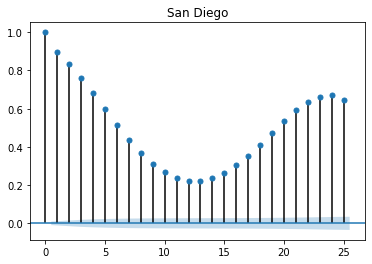

In [48]:
plot_acf(humidity["San Diego"],lags=25,title="San Diego")
plt.show()

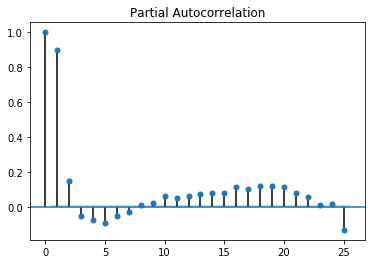

In [49]:
# Partial Autocorrelation of humidity of San Diego
plot_pacf(humidity["San Diego"],lags=25)
plt.show()

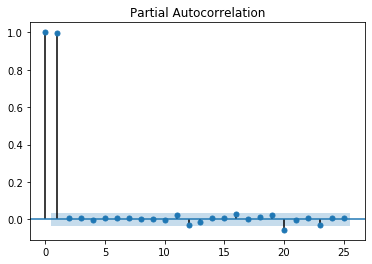

In [50]:
# Partial Autocorrelation of closing price of microsoft
plot_pacf(microsoft["Close"],lags=25)
plt.show()

**Timeseries decomposition and Random Walks**


*Trend* - Consistent upwards or downwards slope of a time series.

*Seasonality* - Clear periodic pattern of a time series(like sine funtion).

*Noise* - Outliers or missing values

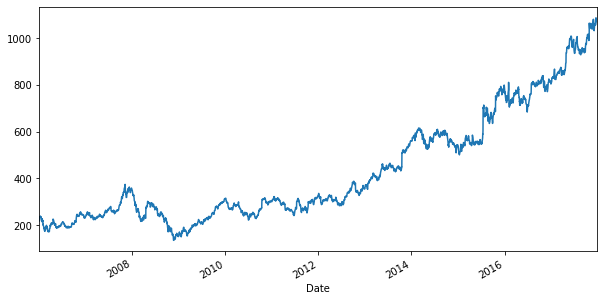

In [51]:
#plot google high 
google['High'].plot(figsize=(10,5))

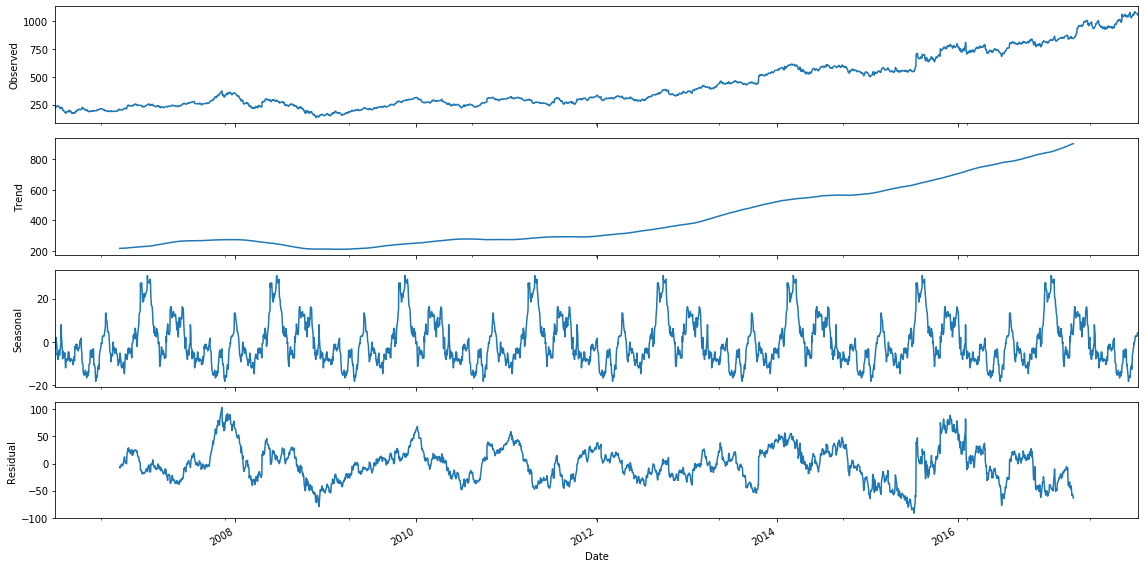

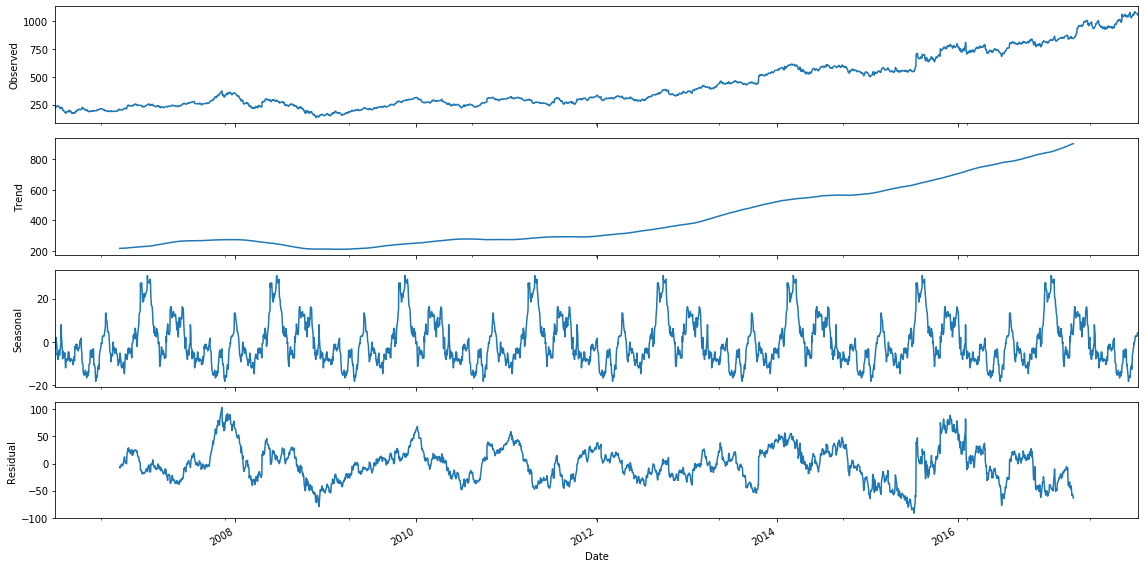

In [52]:
#Decomposed google stock for High

rcParams['figure.figsize'] = 16,8
decomposed_google = sm.tsa.seasonal_decompose(google['High'],freq=360)
decomposed_google.plot()

Upward Trend in the data.

Non uniform Residuals which represents outliers and missing data.

Uniform seasonal Change.


**White Noise**

White noise has

Constant mean

Constant variance

Zero auto-correlation at all lags


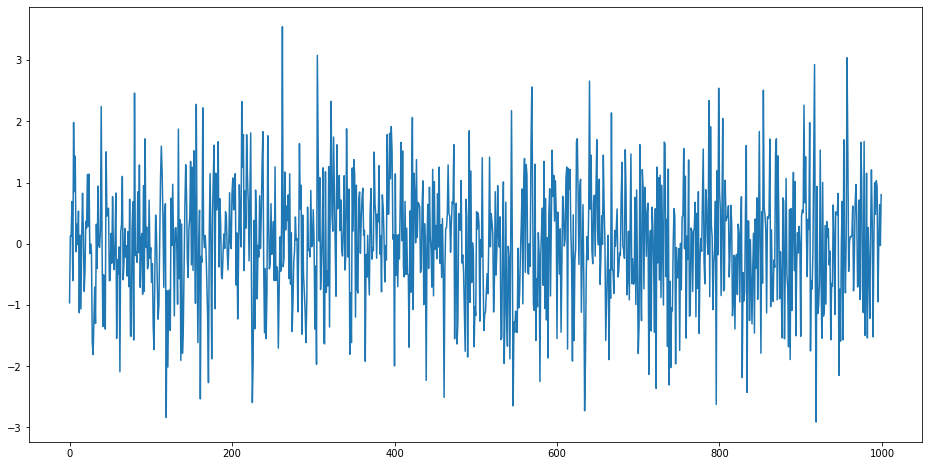

In [53]:
#plotting white noise
#Draw random samples from a normal (Gaussian) distribution.loc is mean,scale is variance

white_noise = np.random.normal(loc=0,scale=1,size=1000)
plt.plot(white_noise)

<Figure size 720x360 with 0 Axes>

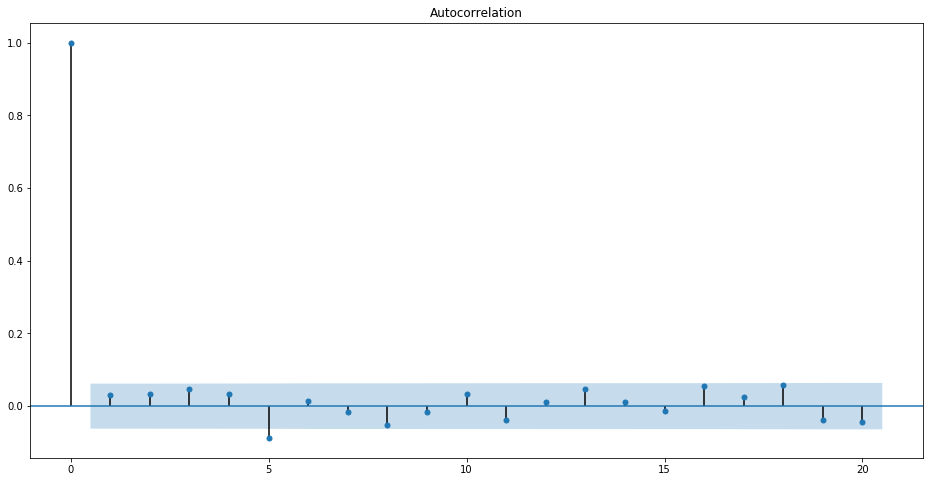

In [54]:
#plotting auto corelation of whitenoise
plt.figure(figsize=(10,5))
plot_acf(white_noise,lags=20)
plt.show()

**Augmented Dickey Fuller Test**

The augmented Dickey–Fuller (ADF) statistic, used in the test, is a negative number. The more negative it is, the stronger the rejection of the hypothesis that there is a unit root at some level of confidence.

In [55]:
adf = adfuller(microsoft['Volume'])
print('P value of Microsoft-Volume is:',adf[1])

adf = adfuller(google['Volume'])
print('P value of Google-Volume is:',adf[1])



P value of Microsoft-Volume is: 0.00032015252776519996
P value of Google-Volume is: 6.510719605768194e-07


**Generating Random Walk and dispalying the distribution plot**



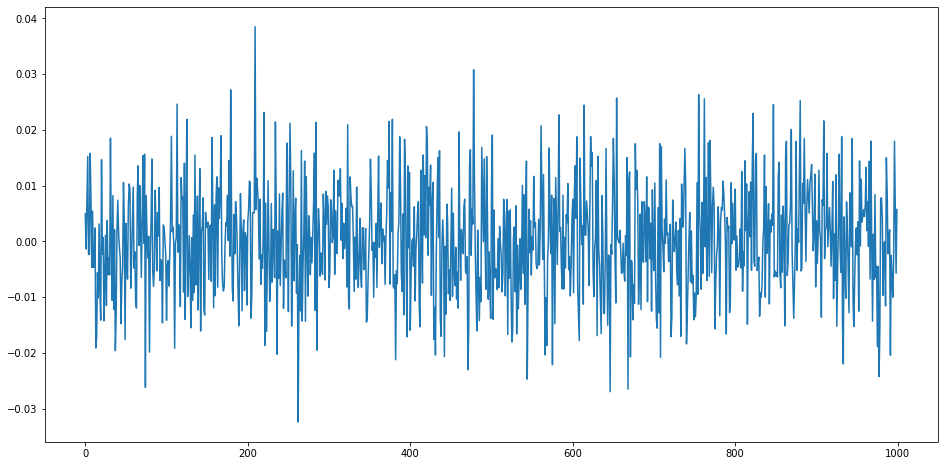

In [56]:
seed(42)
rcParams = 10, 5
random_walk = normal(loc=0,scale=0.01,size=1000)
plt.plot(random_walk)
plt.show()

In [57]:
fig = ff.create_distplot([random_walk],['Random Walk'],bin_size=0.001)
iplot(fig, filename='Basic Distplot')

**Stationarity**

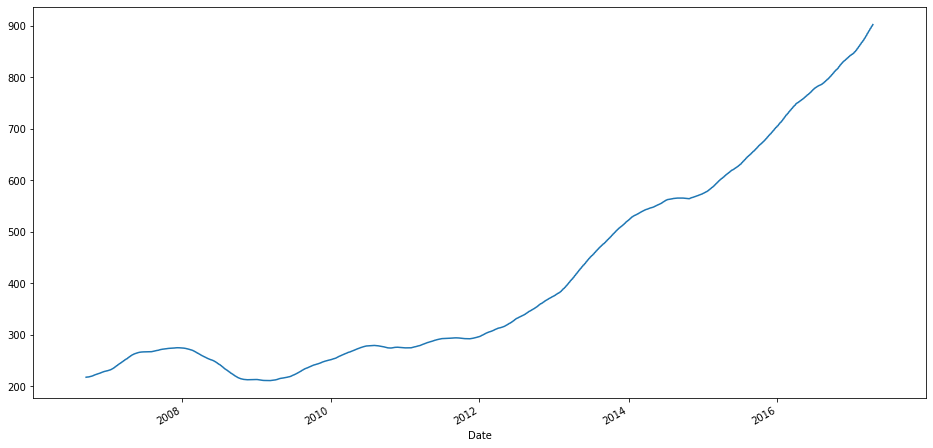

In [58]:
#Plotting non stationary plot
decomposed_google.trend.plot()

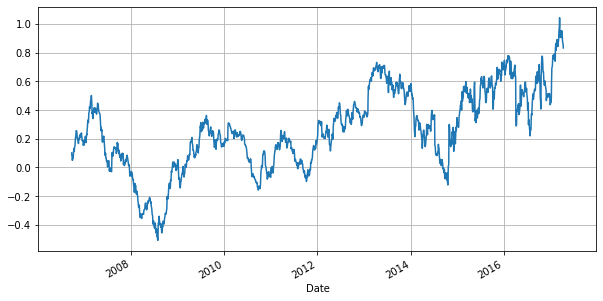

In [59]:
#plotting Stationary plot

plt.figure(figsize=(10,5))
decomposed_google.trend.diff().plot()
plt.grid()

**Modelling With StatsModels (AR+MA)**

An autoregressive (AR) model is a representation of a type of random process; as such, it is used to describe certain time-varying processes in nature, economics, etc. 

The autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term); thus the model is in the form of a stochastic difference equation.



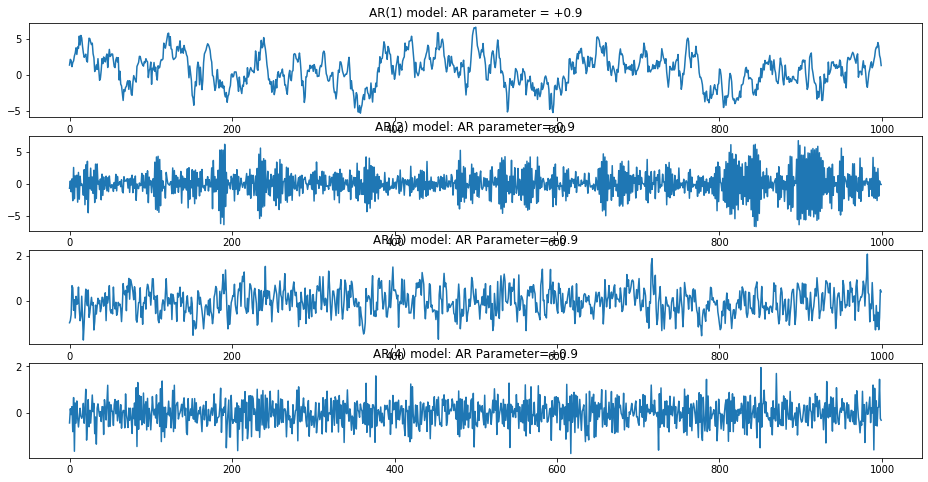

In [60]:

plt.subplot(4,1,1)
ar1 = np.array([1,-0.9])
ma1 = np.array([1])
AR1 = ArmaProcess(ar1,ma1)
sim1 = AR1.generate_sample(nsample=1000)
plt.title('AR(1) model: AR parameter = +0.9')
plt.plot(sim1)

plt.subplot(4,1,2)
ar2 = np.array([1,0.9])
ma2 = np.array([1])
AR2 = ArmaProcess(ar2,ma2)
sim2 = AR2.generate_sample(nsample=1000)
plt.title('AR(2) model: AR parameter=-0.9')
plt.plot(sim2)

plt.subplot(4,1,3)
ar3 = np.array([2,-0.9])
ma3 = np.array([1])
AR3 = ArmaProcess(ar3,ma3)
sim3 = AR3.generate_sample(nsample=1000)
plt.title('AR(3) model: AR Parameter=+0.9')
plt.plot(sim3)


plt.subplot(4,1,4)
ar4 = np.array([2,0.9])
ma4 = np.array([1])
AR4 = ArmaProcess(ar4,ma4)
sim4 = AR4.generate_sample(nsample=1000)
plt.title('AR(4) model: AR Parameter=+0.9')
plt.plot(sim4)



#### **Forecasting a simulated Model**

In [61]:
model = ARMA(sim1, order=(1,0))
result = model.fit()
print('')
print('Result Summary')
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))


Result Summary
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood               -1415.701
Method:                       css-mle   S.D. of innovations              0.996
Date:                Thu, 06 Feb 2020   AIC                           2837.403
Time:                        12:20:09   BIC                           2852.126
Sample:                             0   HQIC                          2842.998
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7072      0.288      2.454      0.014       0.142       1.272
ar.L1.y        0.8916      0.014     62.742      0.000       0.864       0.919
                                    

**Predicting the Models**

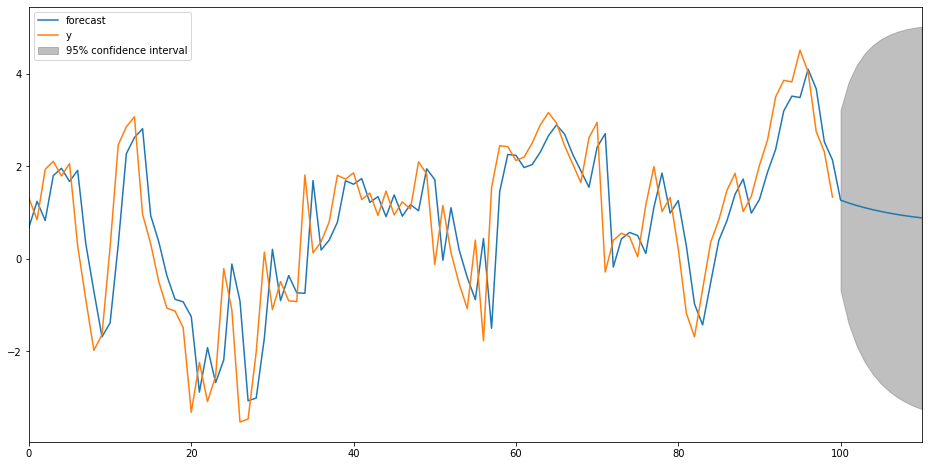

In [62]:
result.plot_predict(start=900,end=1010)
plt.show()

In [63]:
rmse = math.sqrt(mean_squared_error(sim1[900:1011],result.predict(start=900,end=999)))

In [64]:
print('RMSE is:',format(rmse))

RMSE is: 1.0408054512080593


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                45251
Model:                     ARMA(1, 0)   Log Likelihood             -153558.221
Method:                       css-mle   S.D. of innovations              7.203
Date:                Thu, 06 Feb 2020   AIC                         307122.442
Time:                        12:20:10   BIC                         307148.602
Sample:                             0   HQIC                        307130.675
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.029     -0.026      0.979      -0.058       0.056
ar.L1.y       -0.1611      0.005    -34.721      0.000      -0.170      -0.152
                                    Roots           

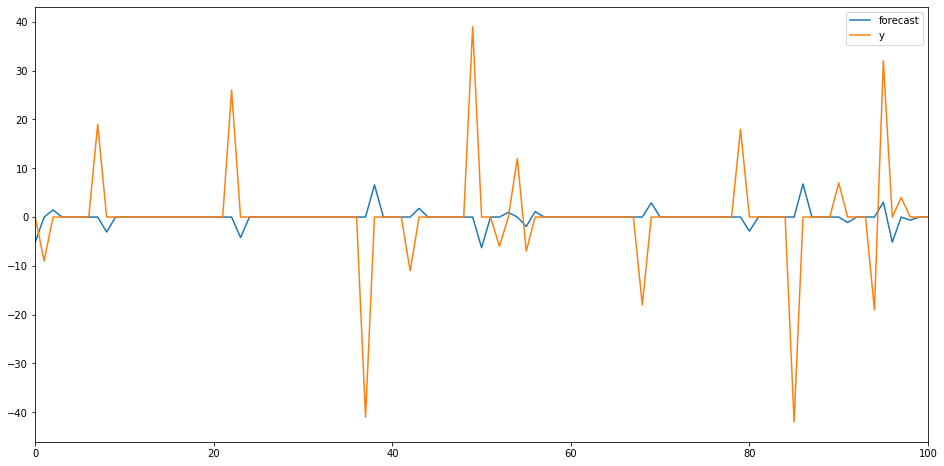

In [65]:
#Predicting humidity level

humid = ARMA(humidity['Montreal'].diff().iloc[1:].values,order=(1,0))
result_2 = humid.fit()
print(result_2.summary())
result_2.plot_predict(start=1000,end=1100)
plt.show()


In [66]:
rmse = math.sqrt(mean_squared_error(humidity['Montreal'].diff().iloc[900:1000].values,result_2.predict(start=900,end=999)))
print('RMSE',format(rmse))


RMSE 8.029135154791325


#### Predicting Closing prices of google

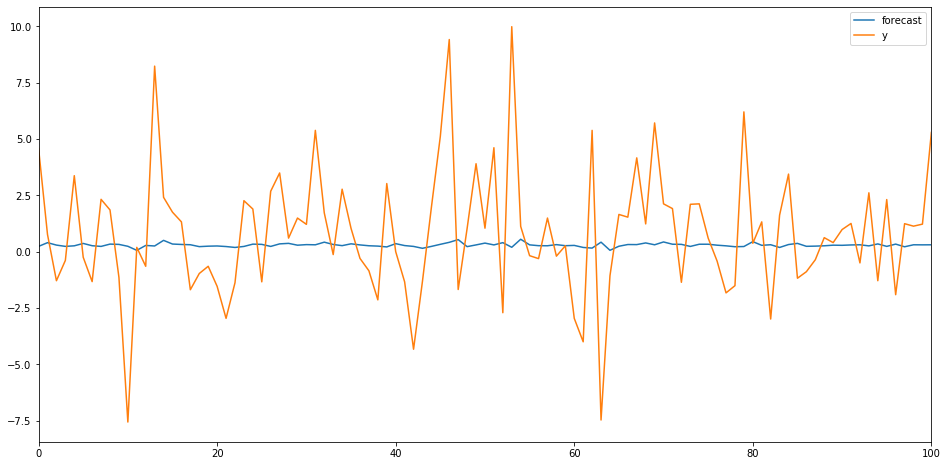

In [67]:
google_close = ARMA(google['Close'].diff().iloc[1:].values,order=(1,0))
result_3 = google_close.fit()
result_3.plot_predict(start=900,end=1000)
plt.show()

#### MA Models:
    The moving-average (MA) model is a common approach for modeling univariate time series. The moving-average model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.
    
    It translates to Today's returns = mean + today's noise + yesterday's noise

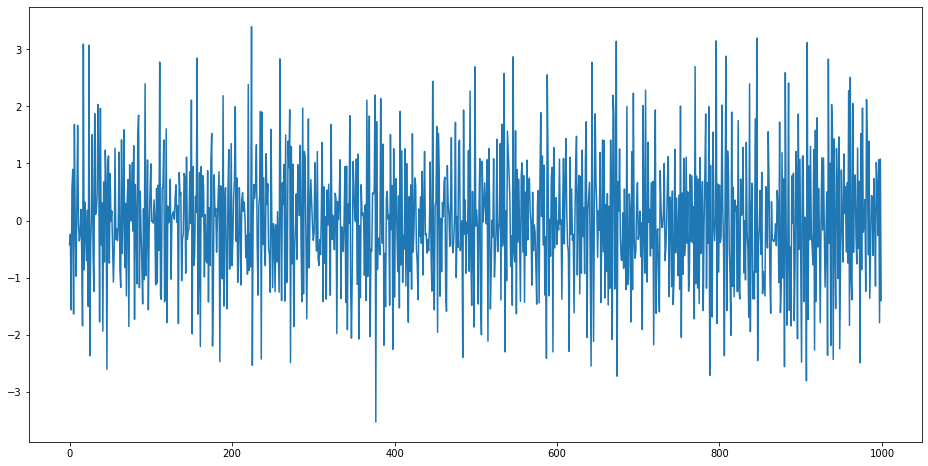

In [68]:
ar1 = np.array([1])
ma1 = np.array([1,-0.5])
MA1 = ArmaProcess(ar1,ma1)
sim1 = MA1.generate_sample(nsample=1000)
plt.plot(sim1)

#### Forecasting the simulated MA Model

In [69]:
model = ARMA(sim1,order=(0,1))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1423.276
Method:                       css-mle   S.D. of innovations              1.004
Date:                Thu, 06 Feb 2020   AIC                           2852.553
Time:                        12:20:11   BIC                           2867.276
Sample:                             0   HQIC                          2858.148
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0228      0.014     -1.652      0.099      -0.050       0.004
ma.L1.y       -0.5650      0.027    -20.797      0.000      -0.618      -0.512
                                    Roots           

#### Predicting using MA Model for Montreal Humidity

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                45251
Model:                     ARMA(0, 3)   Log Likelihood             -153516.982
Method:                       css-mle   S.D. of innovations              7.197
Date:                Thu, 06 Feb 2020   AIC                         307043.965
Time:                        12:20:11   BIC                         307087.564
Sample:                             0   HQIC                        307057.686
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.031     -0.025      0.980      -0.061       0.060
ma.L1.y       -0.1621      0.005    -34.507      0.000      -0.171      -0.153
ma.L2.y        0.0386      0.005      8.316      0.0

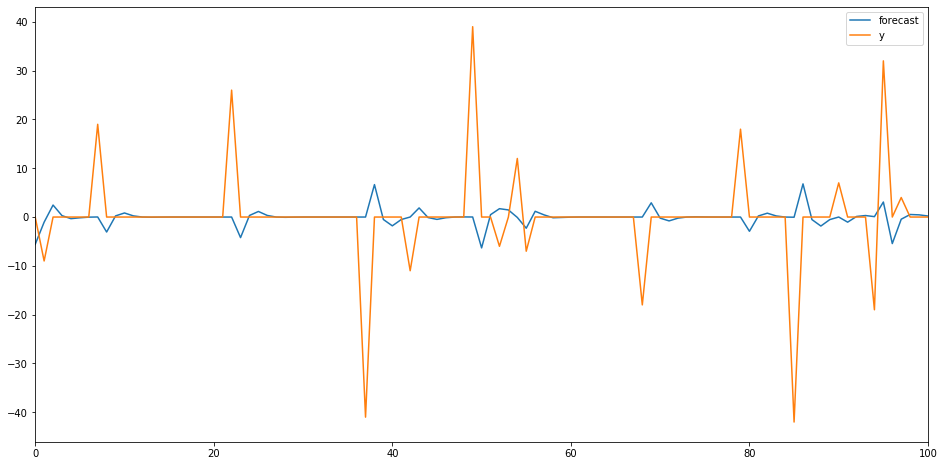

μ=-0.0007776857542758475 ,θ=-0.16209487913837406


In [70]:
model_2 = ARMA(humidity['Montreal'].diff().iloc[1:].values,order=(0,3))
result_3 = model_2.fit()
print(result_3.summary())
result_3.plot_predict(start=1000,end=1100)
plt.show()
print("μ={} ,θ={}".format(result_3.params[0],result_3.params[1]))

In [71]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[1000:1101].values, result_3.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 11.34512883992114.


#### ARMA Models:

               Autoregressive–moving-average (ARMA) models provide a parsimonious description of a (weakly) stationary stochastic process in terms of two polynomials, one for the autoregression and the second for the moving average. It's the fusion of AR and MA models.
               
               Basically, Today's return = mean + Yesterday's return + noise + yesterday's noise.
               

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3018
Model:                     ARMA(3, 3)   Log Likelihood              -55408.974
Method:                       css-mle   S.D. of innovations       22751608.046
Date:                Thu, 06 Feb 2020   AIC                         110833.948
Time:                        12:20:14   BIC                         110882.047
Sample:                             0   HQIC                        110851.244
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.03e+04   9915.479     -2.047      0.041   -3.97e+04    -863.232
ar.L1.y        0.2054      0.160      1.286      0.198      -0.108       0.518
ar.L2.y        0.7296      0.179      4.077      0.0

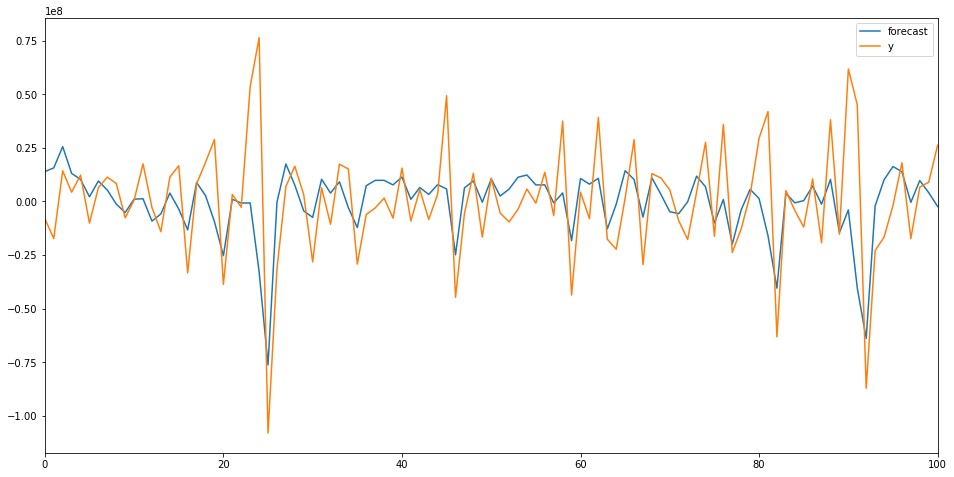

μ=-20297.215014026813 ,θ=0.20536759497988322


In [72]:
model_3 = ARMA(microsoft['Volume'].diff().iloc[1:].values,order=(3,3))
result_4 = model_3.fit()
print(result_4.summary())
result_4.plot_predict(start=1000,end=1100)
plt.show()
print("μ={} ,θ={}".format(result_4.params[0],result_4.params[1]))

In [73]:
rmse = math.sqrt(mean_squared_error(microsoft["Volume"].diff().iloc[1000:1101].values, result_4.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 38038282.806415185.


ARMA model shows better than AR and MA models

#### ARIMA Model:

           An autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average(ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity. ARIMA model is of the form: ARIMA(p,d,q): p is AR parameter, d is differential parameter, q is MA parameter

#### Predicting using ARIMA Model

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 3017
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -56385.467
Method:                       css-mle   S.D. of innovations       31647215.008
Date:                Thu, 06 Feb 2020   AIC                         112778.933
Time:                        12:20:15   BIC                         112802.981
Sample:                             1   HQIC                        112787.581
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9984.0302   2.48e+05      0.040      0.968   -4.75e+05    4.95e+05
ar.L1.D.y     -0.8716      0.016    -53.758      0.000      -0.903      -0.840
ar.L2.D.y     -0.4551      0.016    -28.071      0.0

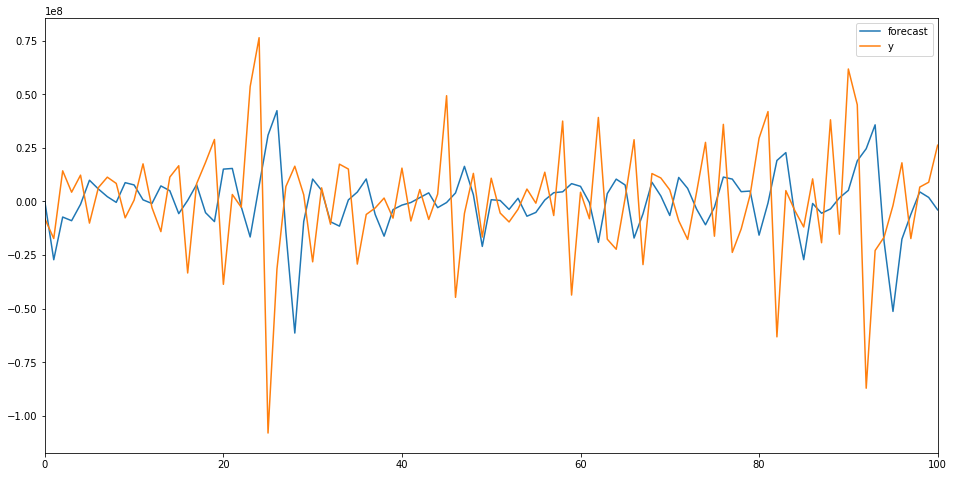

μ=9984.030162412731 ,θ=-0.8715685009707221


In [74]:
model_4 = ARIMA(microsoft['Volume'].diff().iloc[1:].values,order=(2,1,0))
result_5 = model_4.fit()
print(result_5.summary())
result_5.plot_predict(start=1000,end=1100)
plt.show()
print("μ={} ,θ={}".format(result_5.params[0],result_5.params[1]))

In [75]:
rmse = math.sqrt(mean_squared_error(microsoft['Volume'].diff().iloc[700:1001].values, result_5.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 61937614.65140498.


#### VAR Models :
    
    Vector autoregression (VAR) is a stochastic process model used to capture the linear interdependencies among multiple time series. VAR models generalize the univariate autoregressive model (AR model) by allowing for more than one evolving variable. All variables in a VAR enter the model in the same way: each variable has an equation explaining its evolution based on its own lagged values, the lagged values of the other model variables, and an error term. VAR modeling does not require as much knowledge about the forces influencing a variable as do structural models with simultaneous equations: The only prior knowledge required is a list of variables which can be hypothesized to affect each other intertemporally.

C:\Users\subhr\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\varmax.py:159: EstimationWarning:

Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.

C:\Users\subhr\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                           Statespace Model Results                           
Dep. Variable:     ['Close', 'Close']   No. Observations:                 3018
Model:                     VARMA(2,1)   Log Likelihood              -12185.173
                          + intercept   AIC                          24404.346
Date:                Thu, 06 Feb 2020   BIC                          24506.556
Time:                        12:20:21   HQIC                         24441.099
Sample:                             0                                         
                               - 3018                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):                77.67, 78.77   Jarque-Bera (JB):   48240.76, 14927.12
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         3.32, 1.62   Skew:                      1.15, -0.03
Prob(H) (two-sided):            0.00,

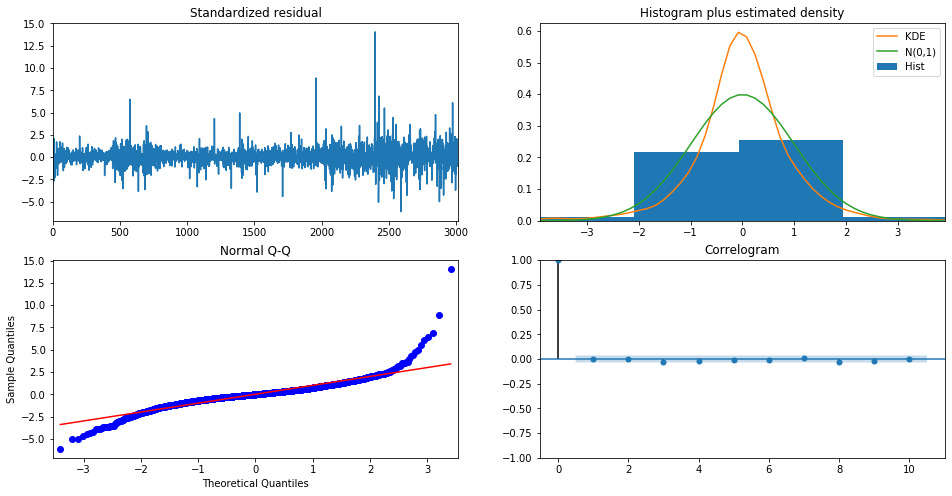

The root mean squared error is 3.674231139437117.


In [76]:
#Predicting google and Microsoft Close Prices

train_sample = pd.concat([google['Close'].diff().iloc[1:],microsoft['Close'].diff().iloc[1:]],axis=1)
model_5 = sm.tsa.VARMAX(train_sample,order=(2,1),trend='c')
result_6 = model_5.fit(maxiter=1000,disp=False)
print(result_6.summary())
predicted_result = result_6.predict(start=0, end=1000)
result_6.plot_diagnostics()
plt.show()

# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

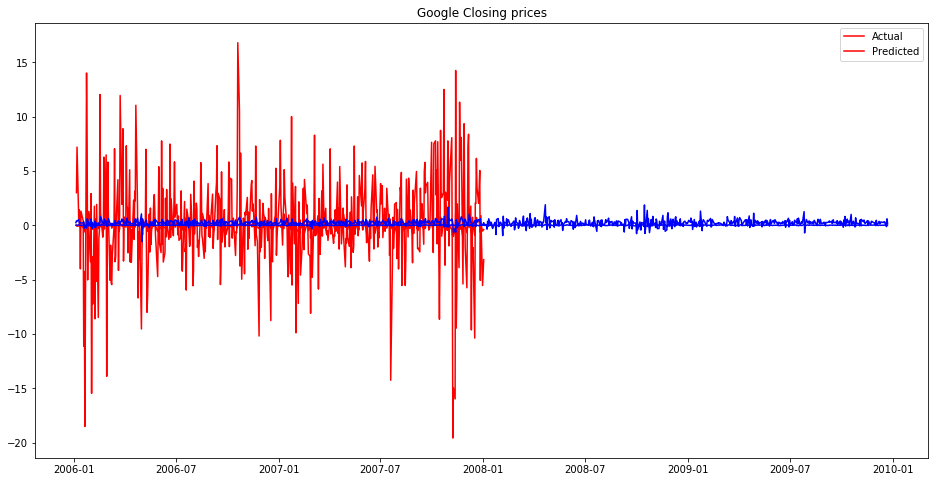

In [78]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Google Closing prices')
plt.show()

#### Unobserved Components:
    
    A UCM decomposes the response series into components such as trend, seasons, cycles, and the regression effects due to predictor series.
    
    Source: http://support.sas.com/documentation/cdl/en/etsug/66840/HTML/default/viewer.htm#etsug_ucm_details01.htm

                        Unobserved Components Results                         
Dep. Variable:                      y   No. Observations:                 3018
Model:                    local level   Log Likelihood              -10116.511
Date:                Thu, 06 Feb 2020   AIC                          20237.023
Time:                        12:30:23   BIC                          20249.047
Sample:                             0   HQIC                         20241.346
                               - 3018                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular    47.7219      0.384    124.248      0.000      46.969      48.475
sigma2.level      5.033e-05      0.000      0.458      0.647      -0.000       0.000
Ljung-Box (Q):              

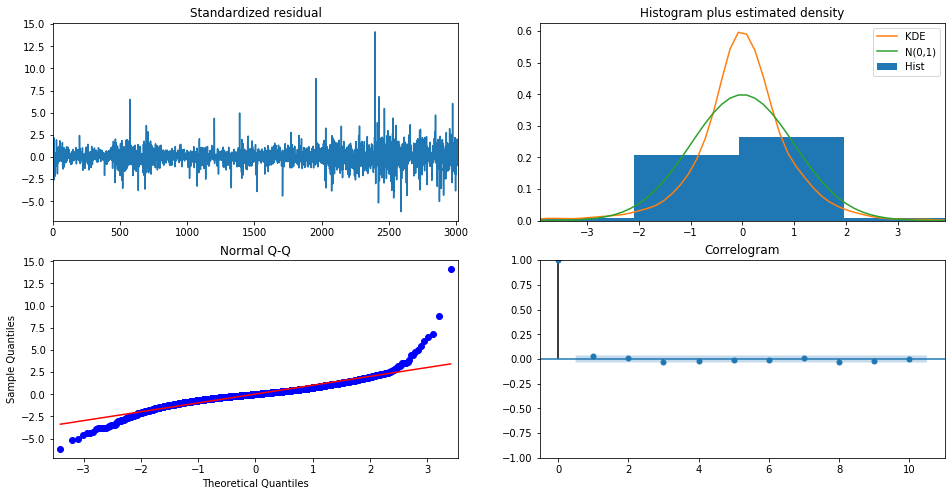

In [80]:
# Predicting closing price of Google'
train_sample = google["Close"].diff().iloc[1:].values
model = sm.tsa.UnobservedComponents(train_sample,'local level')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

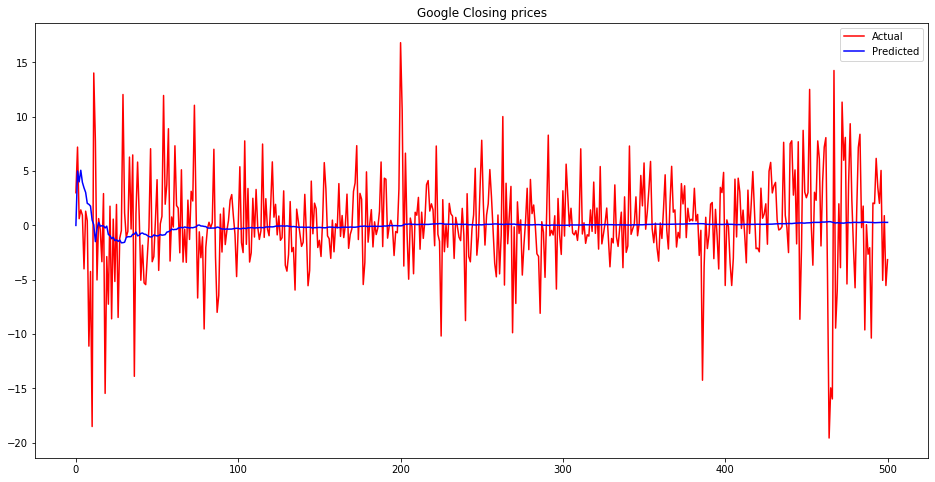

In [81]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Google Closing prices')
plt.show()

#### Dynamic Factor Models:
    
    Dynamic-factor models are flexible models for multivariate time series in which the observed endogenous variables are linear functions of exogenous covariates and unobserved factors, which have a vector autoregressive structure. The unobserved factors may also be a function of exogenous covariates. The disturbances in the equations for the dependent variables may be autocorrelated.

C:\Users\subhr\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                                   Statespace Model Results                                  
Dep. Variable:                    ['Close', 'Close']   No. Observations:                 3018
Model:             DynamicFactor(factors=1, order=2)   Log Likelihood              -12198.578
Date:                               Thu, 06 Feb 2020   AIC                          24409.156
Time:                                       12:32:04   BIC                          24445.230
Sample:                                            0   HQIC                         24422.128
                                              - 3018                                         
Covariance Type:                                 opg                                         
Ljung-Box (Q):                77.67, 95.04   Jarque-Bera (JB):   48193.61, 15037.19
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         3.36, 1.62   Skew:                      1.14, -0

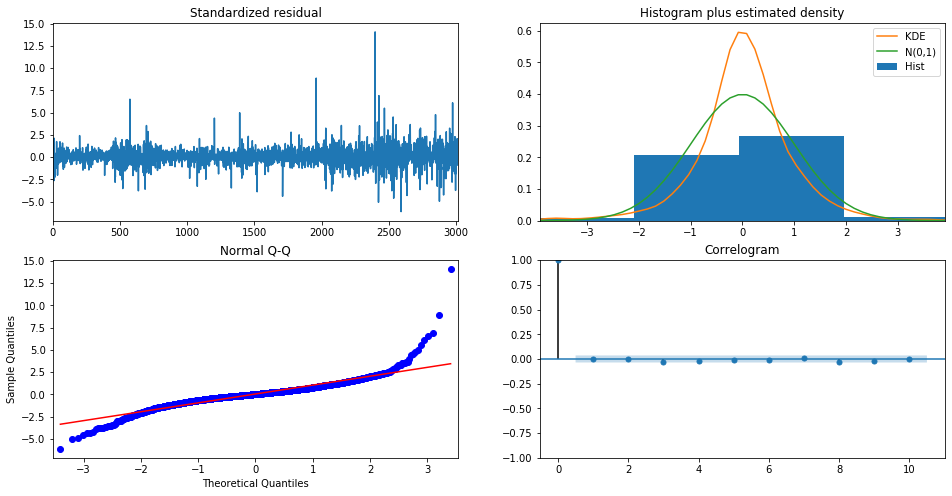

In [82]:
# Predicting closing price of Google and microsoft
train_sample = pd.concat([google['Close'].diff().iloc[1:],microsoft['Close'].diff().iloc[1:]],axis=1)
model = sm.tsa.DynamicFactor(train_sample, k_factors=1, factor_order=2)
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))